In [2]:
import pennylane as qml
from pennylane import numpy as np

# Circuits and QNodes

## Functions

In [ ]:
# In PennyLane, we need to specify a device on which the quantum circuit will run
dev = qml.device("default.qubit", wires = 2)
    # default.qubit: Vanilla qubit quantum device, for circuits without noise. 
    #               It is not optimized for performance, but it's the first one 
    #               to be upgraded and will have the most advanced features at 
    #               any point in time.
    # lightning.qubit: A fast noiseless qubit device. It is optimized for performance 
    #               via a C++ backend, but its development will often lag a bit behind 
    #               default.qubit.
    # default.mixed: A qubit device that allows noisy gates. It works with the density 
    #               operator representation of quantum states.

In [ ]:
@qml.qnode(dev)
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

print(my_first_quantum_function(np.pi/4))


def my_second_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

qnode = qml.QNode(my_second_quantum_function, dev) 
print(qnode(np.pi/4))

[ 0.19134172+0.46193977j -0.19134172-0.46193977j -0.19134172+0.46193977j
  0.19134172-0.46193977j]
[ 0.19134172+0.46193977j -0.19134172-0.46193977j -0.19134172+0.46193977j
  0.19134172-0.46193977j]


In [9]:
dev_ct = qml.device("default.qubit", wires=["control", "target"])

def create_entanglement():
    qml.Hadamard(wires="control")
    qml.CNOT(wires=["control", "target"])
    return qml.state()

qnode_ent = qml.QNode(create_entanglement, dev_ct)
print(qnode_ent)

<QNode: device='<default.qubit device (wires=2) at 0x7fdb736435c0>', interface='auto', diff_method='best', shots='Shots(total=None)'>


## Subcircuits

0: ──RX(0.30)──H─╭●──RX(0.20)─┤  
1: ──Y───────────╰X──Y────────┤  


(<Figure size 700x300 with 1 Axes>, <Axes: >)

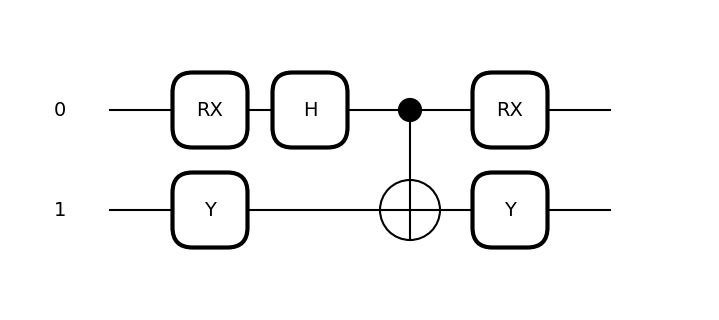

In [13]:
def subcircuit_1(angle):
    qml.RX(angle, wires = 0)
    qml.PauliY(wires = 1)

def subcircuit_2():
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])

def full_circuit(theta, phi):
    subcircuit_1(theta)
    subcircuit_2()
    subcircuit_1(phi)

theta=0.3
phi=0.2

print(qml.draw(full_circuit)(theta,phi))
qml.draw_mpl(full_circuit)(theta,phi)


# Quantum Operations
## Quantum State Preparations

In [15]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.StatePrep(state, wires=range(2), normalize=True)
    return qml.state()

state = circuit([1/2, 1/2, 1/2, 1/2])
print(state)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [ ]:
@qml.qnode(dev)
def superposition():
    for i in range(2):
        qml.H(wires=i)

    return qml.state()

state = superposition()
print(state)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [ ]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def prep_circuit(alpha, beta, gamma):
    """
    Prepares the state alpha|001> + beta|010> + gamma|100>.
    Args:
    alpha, beta, gamma (np.complex): The coefficients of the quantum state
    to prepare.
    Returns:
    (np.array): The quantum state
    """

    qml.StatePrep([0, alpha, beta, 0, gamma, 0, 0, 0], wires=range(3), normalize=True)  
    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3),

print("The prepared state is", prep_circuit(alpha, beta, gamma))
qml.T()

In [18]:
qml.BasisState(np.array([1, 0, 0]), wires=range(3))

BasisState(tensor([1, 0, 0], requires_grad=True), wires=[0, 1, 2])

## Single Qubit Gates

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def single_qubit_gates(theta, phi):
    """
    Implements the quantum circuit shown in the statement
    Args:
    - theta, phi (float): The arguments for the RX and RZ gates, respectively
    Returns:
    - (np.array): The output quantum state.
    
    """

    qml.H(wires=0)
    qml.T(wires=0)
    qml.RX(theta, wires=0)

    qml.H(wires=1)
    qml.S(wires=1)
    qml.RZ(phi, wires=1)
    
    return qml.state()

theta, phi = np.pi/3, np.pi/4
print("The output state of the circuit is: ", single_qubit_gates(theta, phi))

## Multi Qubit Gates

(<Figure size 900x400 with 1 Axes>, <Axes: >)

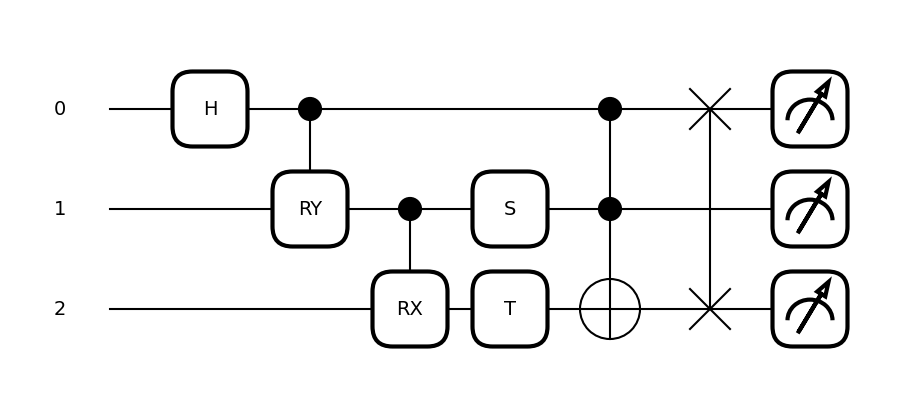

In [25]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def multi_qubit_gates(theta,phi):
    """
    Applies the circuit shown the figure above
    Args:
    theta, phi (float): parameters of the CRX and CRY gates, in that order.
    Returns:
    - (np.array): the quantum state
    """
    qml.H(wires=0)
    qml.CRY(phi, wires=[0,1])
    qml.CRX(theta, wires=[1,2])
    qml.S(wires=1)
    qml.T(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.SWAP([0,2])
    
    return qml.state()

theta, phi = np.pi/3, np.pi/4
qml.draw_mpl(multi_qubit_gates)(theta, phi)
# print("The output state is: \n", multi_qubit_gates(theta, phi))

## Unitary Gates
Personalized unitary gates 

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def qubit_unitaries(U,V):
  qml.QubitUnitary(U, wires = 0)
  qml.QubitUnitary(V, wires = [0,1])
  return qml.state()

U = np.array([[-0.69165024-0.50339329j,  0.28335369-0.43350413j],
       [ 0.1525734 -0.4949106j , -0.82910055-0.2106588j ]])
V = np.array([[-0.01161649+0.12340198j,  0.24202953+0.47179157j,
        -0.66720111+0.23783294j,  0.38909577-0.22439714j],
       [-0.47281374+0.235468j  , -0.51436345+0.28615452j,
         0.34116689+0.18781118j,  0.08677015-0.46405913j],
       [-0.53198348+0.60728927j,  0.34990852-0.34440384j,
         0.00247372-0.07165224j,  0.18828175+0.257979j  ],
       [-0.07641446-0.2190734j ,  0.27910452-0.23115134j,
         0.03829659-0.58309818j,  0.21999088-0.65189823j]])

print(qubit_unitaries(U,V))

### Controlled Unitary

You can make any gate controlled, either by activating when a value 1 or 0 is detected in the control qubit or qubits.

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def controlled_gate_circuit(angle):
   qml.PauliX(0) #Flip to |1> for RX to act on the second wire
   qml.ctrl(qml.RX, control = (0), control_values=(1))(angle, wires=[1])
   return qml.state()

In [ ]:
dev = qml.device("default.qubit", wires = 3)

U =[[ 0.94877869,  0.31594146], [-0.31594146,  0.94877869]]

@qml.qnode(dev)
def circuit_controlled_unitary():

  qml.PauliX(wires = 1) #Flip to apply the controlled gate
  qml.ControlledQubitUnitary(U, control_wires = (0,1), wires = (2), control_values = (0,1))
  return qml.state()

(<Figure size 700x400 with 1 Axes>, <Axes: >)

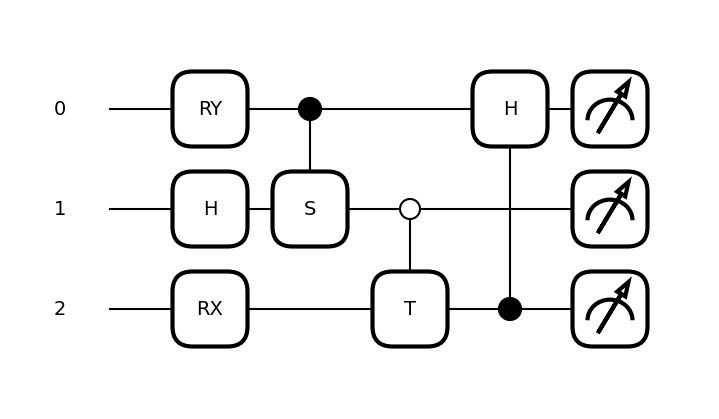

In [28]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def ctrl_circuit(theta,phi):
    """Implements the circuit shown in the Codercise statement
    Args:
        theta (float): Rotation angle for RX
        phi (float): Rotation angle for RY
    Returns:
        (numpy.array): The output state of the QNode
    """

    qml.RY(phi, wires=0)
    qml.H(wires=1)
    qml.RX(theta, wires=2)

    qml.ctrl(qml.S, control=(0), control_values=(1))(1)
    qml.ctrl(qml.T, control=(1), control_values=(0))(2)
    qml.ctrl(qml.H, control=(2), control_values=(1))(0)
    
    return qml.state()

qml.draw_mpl(ctrl_circuit)(theta, phi)


## Inverse Operations

In many quantum algorithms, we need to apply the inverse of an operator
If
is unitary, this amounts to applying the adjoint

We can do this in PennyLane by using the qml.adjoint function, which acts on a quantum gate or quantum function.

In [29]:
qml.adjoint(qml.RX)(0.5, wires = 0)

Adjoint(RX(0.5, wires=[0]))

In [31]:
def q_function(theta, phi, omega):
  qml.RX(theta, wires = 0)
  qml.RY(phi, wires = 1)
  qml.RZ(omega, wires = 2)
theta,phi,omega = np.pi / 2, np.pi / 2, np.pi / 2
qml.adjoint(q_function)(theta,phi,omega)

[Adjoint(RZ(1.5707963267948966, wires=[2])),
 Adjoint(RY(1.5707963267948966, wires=[1])),
 Adjoint(RX(1.5707963267948966, wires=[0]))]

The state after phase kickback is: 
 [ 0.15417488-0.25169664j  0.0762867 -0.2474553j   0.84582512+0.25169664j
 -0.0762867 +0.2474553j ]


(<Figure size 600x300 with 1 Axes>, <Axes: >)

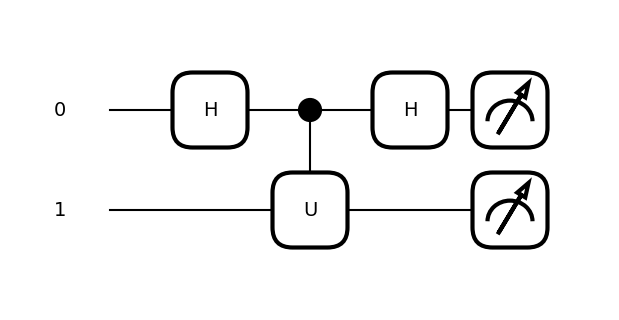

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def phase_kickback(matrix):
    """Applies phase kickback to a single-qubit operator whose matrix is known
    Args:S
    - matrix (numpy.array): A 2x2 matrix
    Returns:
    - (numpy.array): The output state after applying phase kickback
    """

    qml.H(wires=(0))
    qml.ControlledQubitUnitary(matrix, wires=(0,1), control_values = (1))   
    qml.H(wires=(0))

    return qml.state()

matrix = np.array([[-0.69165024-0.50339329j,  0.28335369-0.43350413j],
    [ 0.1525734 -0.4949106j , -0.82910055-0.2106588j ]])

print("The state after phase kickback is: \n" , phase_kickback(matrix))
qml.draw_mpl(phase_kickback)(matrix)

In [42]:
dev = qml.device("default.qubit")

def do(k):

    qml.StatePrep([1,k], wires = [0], normalize = True)

def apply(theta):

    qml.IsingXX(theta, wires = [1,2])

@qml.qnode(dev)
def do_apply_undo(k,theta):
    """
    Applies V, controlled-U, and the inverse of V
    Args: 
    - k, theta: The parameters for do and apply (V and U) respectively
    Returns:
    - (np.array): The output state of the routine
    """

    do(k)
    qml.ctrl(apply, control=(0), control_values=(1))(theta)
    qml.adjoint(do)(k)

    return qml.state()

k, theta = 0.5, 0.8

print("The output state is: \n", do_apply_undo(k, theta))

The output state is: 
 [ 0.9842122+0.j          0.       +0.j          0.       +0.j
  0.       -0.07788367j -0.0315756+0.j          0.       +0.j
  0.       +0.j          0.       -0.15576734j]


# Measurements

## Observables

Represented by Hermitian Operators. Probability of Measuring $\lambda_i$:

$$
p(i) = |\braket{\lambda_i|\psi}|^2
$$

Observables can be constructed as:

$$
O = \frac{1}{2} X \otimes X + \frac{1}{4} Y \otimes Y
$$

In [43]:
O = 1/2 * qml.X(0)@qml.X(1) + 1/4 * qml.Y(0) @ qml.Y(1)

## General

Measurements in Pennylane can be done in different ways:
| Measurement        | PennyLane function | Output type | Requires shots > 0 | Is differentiable  | Requires an observable | Example output |
|--------------------|--------------------|-------------|--------------------|--------------------|------------------------|----------------|
| Sample             | `qml.sample`       | Array       | Yes                | No                 | No                     | `array([0, 1])` |
| Counts             | `qml.counts`       | Dict        | Yes                | No                 | No                     | `{'01': 1}` |
| Probability        | `qml.probs`        | Array       | No                 | Yes                | No                     | `array([0., 1., 0., 0.])` |
| Expectation value  | `qml.expval`       | Float       | No                 | Yes                | Yes                    | `qml.expval(qml.Z(wires=0)), qml.expval(qml.Z(wires=1)) → (1.0, -1.0)` |


### Samples

Defined with `qml.sample()` and the num of shots defined in the device `qml.device(shots=...)`

In [46]:
dev = qml.device("default.qubit", wires = 1, shots = 10)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    return qml.sample()
print(circuit())

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


### Counts
Same as samples, but with `qml.counts()`

In [ ]:
dev = qml.device("default.qubit", wires = 1, shots = 1000)

@qml.qnode(dev)
def circuit_counts():
    qml.Hadamard(wires = 0)
    return qml.counts()
print(circuit_counts())

{np.str_('0'): np.int64(507), np.str_('1'): np.int64(493)}


### Probabilities
Same as samples and counts, but with `qml.probs()`

In [ ]:
dev = qml.device("default.qubit", wires = 2) # No shots means analytical calculation

@qml.qnode(dev)
def simple_circuit():
    qml.PauliX(1)

    return qml.probs() # Computational basis measurement (00, 01, 10, 11)
print(simple_circuit())

[0. 1. 0. 0.]


In the default setting for qml.probs, we obtain the probabilities for the entire multi-qubit system. But we can also call the probabilities in specific wires via the wires argument.

In [61]:
@qml.qnode(dev)
def simple_circuit():
    qml.PauliX(1)

    return qml.probs(wires = 0)
print(simple_circuit())

[1. 0.]


Non computational basis:

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def prob_circuit_paulix():
    
    qml.PauliX(1)

    return qml.probs(op = qml.PauliX(0)@qml.PauliX(1))

print(prob_circuit_paulix()) 
# This means that we have an equal chance of getting any state in the basis,
# which is the basis composed of Pauli-X’s eigenstates

[0.25 0.25 0.25 0.25]


### Expectation Values

Expectation values are probably the most used type of measurement, especially for optimization and machine learning since they give useful information about the state and they’re differentiable (not stochastic)

$$
\braket{\hat{O}} = \braket{ \psi | \hat{O} | \psi }
$$

`qml.expval(op=O(wires))`

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def simple_circuit_expval():
    qml.PauliX(wires = 1)
    return qml.expval(qml.PauliZ(0))

simple_circuit_expval()

# Gradients and Optimization
## Circuits as Functions